# *DA lab 4주차 네트워크 분석: 특허데이터에서 IPC 동시출현 네트워크 생성

In [1]:
import pandas as pd
import itertools as it
import pymysql

In [4]:
conn = pymysql.connect(host="localhost", user="root", password="kktmlab1", db="da", charset="utf8mb4")
cursor = conn.cursor()
cursor.execute("SELECT * FROM da.patent_ipc")
db=cursor.fetchall()

In [5]:
patent_list=[]
edg_list=[]

In [6]:
for reg_num, ipcfull in db:
    edg_list.append((reg_num, ipcfull, 1)) # (특허,IPC,1), (특허, IPC,1)
    patent_list.append(reg_num)

In [7]:
edg_list

[(9848521, 'A01B', 1),
 (9848521, 'B07B', 1),
 (9848521, 'E02F', 1),
 (9848522, 'A01B', 1),
 (9848522, 'G01L', 1),
 (9848523, 'A01B', 1),
 (9848523, 'A01C', 1),
 (9848523, 'G01L', 1),
 (9848524, 'A01B', 1),
 (9848524, 'A01C', 1),
 (9848525, 'A01C', 1),
 (9848525, 'B65G', 1),
 (9848526, 'A01B', 1),
 (9848526, 'A01C', 1),
 (9848527, 'A01B', 1),
 (9848527, 'A01C', 1),
 (9848528, 'A01C', 1),
 (9848528, 'G01S', 1),
 (9848529, 'A01D', 1),
 (9848530, 'A01D', 1),
 (9848530, 'A01F', 1),
 (9848531, 'A01D', 1),
 (9848532, 'A01D', 1),
 (9848533, 'A01D', 1),
 (9848534, 'A01D', 1),
 (9848535, 'A01D', 1),
 (9848536, 'A01B', 1),
 (9848536, 'A01D', 1),
 (9848536, 'A01F', 1),
 (9848536, 'B60P', 1),
 (9848536, 'B65G', 1),
 (9848537, 'A01D', 1),
 (9848537, 'A01F', 1),
 (9848538, 'A01B', 1),
 (9848538, 'A01G', 1),
 (9848538, 'B66F', 1),
 (9848539, 'A01G', 1),
 (9848539, 'B26B', 1),
 (9848540, 'A01G', 1),
 (9848540, 'F21V', 1),
 (9848541, 'A01G', 1),
 (9848542, 'A01G', 1),
 (9848542, 'A01N', 1),
 (9848542, 

In [8]:
edg_list2=dict()

In [9]:
edg_list[0]

(9848521, 'A01B', 1)

In [12]:
edg_list2
# edg_list2[9848537]

{9848521: ['A01B', 'B07B', 'E02F'],
 9848522: ['A01B', 'G01L'],
 9848523: ['A01B', 'A01C', 'G01L'],
 9848524: ['A01B', 'A01C'],
 9848525: ['A01C', 'B65G'],
 9848526: ['A01B', 'A01C'],
 9848527: ['A01B', 'A01C'],
 9848528: ['A01C', 'G01S'],
 9848529: ['A01D'],
 9848530: ['A01D', 'A01F'],
 9848531: ['A01D'],
 9848532: ['A01D'],
 9848533: ['A01D'],
 9848534: ['A01D'],
 9848535: ['A01D'],
 9848536: ['A01B', 'A01D', 'A01F', 'B60P', 'B65G'],
 9848537: ['A01D', 'A01F'],
 9848538: ['A01B', 'A01G', 'B66F'],
 9848539: ['A01G', 'B26B'],
 9848540: ['A01G', 'F21V'],
 9848541: ['A01G'],
 9848542: ['A01G', 'A01N', 'C05G', 'E02B'],
 9848543: ['A01G'],
 9848544: ['A01G'],
 9848545: ['A01G'],
 9848546: ['A01H'],
 9848547: ['A01H', 'A23L', 'C12N'],
 9848548: ['A01G', 'A01H', 'C12N'],
 9848549: ['A01H'],
 9848550: ['A01H'],
 9848551: ['A01H', 'C12N'],
 9848552: ['A01H', 'C12N'],
 9848553: ['A01H', 'C12N'],
 9848554: ['A01H', 'C12N'],
 9848555: ['A01H', 'C12N'],
 9848556: ['A01H', 'C12N'],
 9848557: ['A01H

In [10]:
#{특허번호: (ipc1, ipc2)} 생성
for reg, ipc,_ in edg_list:
    if edg_list2.get(reg): #키가 없을 경우 none
        edg_list2[reg].append(ipc) #기존 특허의 값인 IPC 리스트에 append 추가!!
    else: 
        edg_list2[reg]=[ipc] #새로온 특허의 값으로 IPC 리스트 생성 {특허번호: (ipc1,ipc)}

In [11]:
edg_list2


{9848521: ['A01B', 'B07B', 'E02F'],
 9848522: ['A01B', 'G01L'],
 9848523: ['A01B', 'A01C', 'G01L'],
 9848524: ['A01B', 'A01C'],
 9848525: ['A01C', 'B65G'],
 9848526: ['A01B', 'A01C'],
 9848527: ['A01B', 'A01C'],
 9848528: ['A01C', 'G01S'],
 9848529: ['A01D'],
 9848530: ['A01D', 'A01F'],
 9848531: ['A01D'],
 9848532: ['A01D'],
 9848533: ['A01D'],
 9848534: ['A01D'],
 9848535: ['A01D'],
 9848536: ['A01B', 'A01D', 'A01F', 'B60P', 'B65G'],
 9848537: ['A01D', 'A01F'],
 9848538: ['A01B', 'A01G', 'B66F'],
 9848539: ['A01G', 'B26B'],
 9848540: ['A01G', 'F21V'],
 9848541: ['A01G'],
 9848542: ['A01G', 'A01N', 'C05G', 'E02B'],
 9848543: ['A01G'],
 9848544: ['A01G'],
 9848545: ['A01G'],
 9848546: ['A01H'],
 9848547: ['A01H', 'A23L', 'C12N'],
 9848548: ['A01G', 'A01H', 'C12N'],
 9848549: ['A01H'],
 9848550: ['A01H'],
 9848551: ['A01H', 'C12N'],
 9848552: ['A01H', 'C12N'],
 9848553: ['A01H', 'C12N'],
 9848554: ['A01H', 'C12N'],
 9848555: ['A01H', 'C12N'],
 9848556: ['A01H', 'C12N'],
 9848557: ['A01H

In [13]:
co_edlst={} # {(ipc1, ipc2), frequency}

In [15]:
#특허가 보유한 IPC 간의 동시출현빈도 계산: 특허의 IPC 리스트에서 쌍대비교
for k, v in edg_list2.items(): #items 리스트에서 key와 value를 호출하는 반복문
    for ipc1, ipc2 in it.combinations(v,2):
        tmp=(ipc1,ipc2) if ipc2<ipc1 else(ipc2, ipc1)
        if co_edlst.get(tmp, False):
            co_edlst[tmp]+=1
        else: 
            co_edlst[tmp]=1

In [16]:
co_edlst

{('A01C', 'A01B'): 8,
 ('A01D', 'A01B'): 2,
 ('A01F', 'A01B'): 2,
 ('A01F', 'A01D'): 6,
 ('A01G', 'A01B'): 2,
 ('A01H', 'A01G'): 2,
 ('A01K', 'A01J'): 2,
 ('A01N', 'A01G'): 2,
 ('A01N', 'A01M'): 2,
 ('A21C', 'A21B'): 2,
 ('A21D', 'A21B'): 2,
 ('A21D', 'A21C'): 4,
 ('A23C', 'A01J'): 2,
 ('A23L', 'A01H'): 2,
 ('A23L', 'A01J'): 2,
 ('A23L', 'A23C'): 2,
 ('A23L', 'A23G'): 2,
 ('A23P', 'A23G'): 2,
 ('A41D', 'A01M'): 2,
 ('A42B', 'A01M'): 2,
 ('A42B', 'A41D'): 2,
 ('A45F', 'A01M'): 2,
 ('A45F', 'A41D'): 2,
 ('A45F', 'A42B'): 2,
 ('A47J', 'A21B'): 2,
 ('A47J', 'A21C'): 2,
 ('A47J', 'A21D'): 2,
 ('A61D', 'A01K'): 2,
 ('A61K', 'A01N'): 8,
 ('A61L', 'A01N'): 2,
 ('A61L', 'A61K'): 2,
 ('A61Q', 'A01N'): 2,
 ('A61Q', 'A61K'): 2,
 ('A63B', 'A01K'): 2,
 ('A63H', 'A01K'): 2,
 ('B01F', 'A21C'): 2,
 ('B01F', 'A21D'): 2,
 ('B07B', 'A01B'): 2,
 ('B25B', 'A01K'): 2,
 ('B26B', 'A01G'): 2,
 ('B60P', 'A01B'): 2,
 ('B60P', 'A01D'): 2,
 ('B60P', 'A01F'): 2,
 ('B62D', 'A01M'): 2,
 ('B65B', 'A21D'): 2,
 ('B65D', 

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas
import collections

In [18]:
network_list=[]
for k,v in co_edlst.items():
    network_list.append((k[0],k[1],int(v)))

In [19]:
network_list

[('B01F', 'A21D', 2),
 ('C12N', 'A01H', 48),
 ('G01L', 'A01B', 4),
 ('A45F', 'A42B', 2),
 ('F21V', 'A01G', 2),
 ('B60P', 'A01F', 2),
 ('F25D', 'A23G', 2),
 ('B65G', 'A01F', 2),
 ('E02F', 'A01B', 2),
 ('F21V', 'A01K', 2),
 ('A01H', 'A01G', 2),
 ('A01D', 'A01B', 2),
 ('G08B', 'A01K', 2),
 ('B26B', 'A01G', 2),
 ('A63H', 'A01K', 2),
 ('A21D', 'A21C', 4),
 ('E06B', 'A01M', 2),
 ('A01N', 'A01G', 2),
 ('A41D', 'A01M', 2),
 ('B65D', 'A21D', 2),
 ('F25D', 'A23L', 2),
 ('A61L', 'A01N', 2),
 ('B65B', 'A21D', 2),
 ('B65G', 'A01C', 2),
 ('A61L', 'A61K', 2),
 ('A23C', 'A01J', 2),
 ('F21V', 'B25B', 2),
 ('A42B', 'A01M', 2),
 ('F24J', 'A01K', 2),
 ('G08B', 'A61D', 2),
 ('F16B', 'A01K', 2),
 ('A61D', 'A01K', 2),
 ('C08L', 'A23G', 2),
 ('A23L', 'A01H', 2),
 ('G01L', 'A01C', 2),
 ('A01K', 'A01J', 2),
 ('C12N', 'A23C', 4),
 ('A01C', 'A01B', 8),
 ('A47J', 'A21C', 2),
 ('A23L', 'A23G', 2),
 ('C12N', 'A01K', 2),
 ('F25B', 'A23L', 2),
 ('B01F', 'A21C', 2),
 ('A23L', 'A23C', 2),
 ('A23L', 'A01J', 2),
 ('A61Q',

In [20]:
#add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5)])
P=nx.Graph()
P.add_weighted_edges_from(network_list)

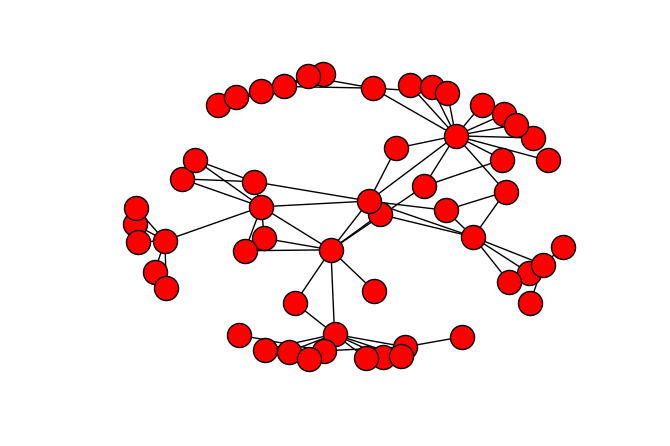

In [21]:
nx.draw_spring(P)
plt.show()

In [23]:
nx.degree_centrality(P).get('A01B')
#https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

0.18518518518518517

In [22]:
nx.degree_centrality(P)

{'A01B': 0.18518518518518517,
 'A01C': 0.07407407407407407,
 'A01D': 0.07407407407407407,
 'A01F': 0.07407407407407407,
 'A01G': 0.16666666666666666,
 'A01H': 0.05555555555555555,
 'A01J': 0.05555555555555555,
 'A01K': 0.25925925925925924,
 'A01M': 0.1111111111111111,
 'A01N': 0.14814814814814814,
 'A21B': 0.05555555555555555,
 'A21C': 0.07407407407407407,
 'A21D': 0.1111111111111111,
 'A22C': 0.018518518518518517,
 'A23C': 0.05555555555555555,
 'A23G': 0.09259259259259259,
 'A23L': 0.12962962962962962,
 'A23P': 0.018518518518518517,
 'A41D': 0.05555555555555555,
 'A42B': 0.05555555555555555,
 'A45F': 0.05555555555555555,
 'A47J': 0.05555555555555555,
 'A61D': 0.037037037037037035,
 'A61K': 0.07407407407407407,
 'A61L': 0.037037037037037035,
 'A61Q': 0.037037037037037035,
 'A63B': 0.037037037037037035,
 'A63H': 0.018518518518518517,
 'B01F': 0.037037037037037035,
 'B07B': 0.037037037037037035,
 'B25B': 0.037037037037037035,
 'B26B': 0.018518518518518517,
 'B60P': 0.07407407407407407,
 

In [24]:
nx.closeness_centrality(P)

{'A01B': 0.3157894736842105,
 'A01C': 0.2465753424657534,
 'A01D': 0.24545454545454545,
 'A01F': 0.24545454545454545,
 'A01G': 0.38848920863309355,
 'A01H': 0.34177215189873417,
 'A01J': 0.29508196721311475,
 'A01K': 0.3724137931034483,
 'A01M': 0.2857142857142857,
 'A01N': 0.3698630136986301,
 'A21B': 0.19285714285714287,
 'A21C': 0.1935483870967742,
 'A21D': 0.23580786026200873,
 'A22C': 0.2,
 'A23C': 0.3103448275862069,
 'A23G': 0.25116279069767444,
 'A23L': 0.32142857142857145,
 'A23P': 0.20149253731343283,
 'A41D': 0.225,
 'A42B': 0.225,
 'A45F': 0.225,
 'A47J': 0.19285714285714287,
 'A61D': 0.27411167512690354,
 'A61K': 0.31952662721893493,
 'A61L': 0.2727272727272727,
 'A61Q': 0.2727272727272727,
 'A63B': 0.28272251308900526,
 'A63H': 0.2727272727272727,
 'B01F': 0.19217081850533807,
 'B07B': 0.242152466367713,
 'B25B': 0.2983425414364641,
 'B26B': 0.28125,
 'B60P': 0.24545454545454545,
 'B62D': 0.22406639004149378,
 'B65B': 0.2317596566523605,
 'B65D': 0.2918918918918919,
 'B65

In [27]:
nx.betweenness_centrality(P)

{'A01B': 0.323549965059399,
 'A01C': 0.03773584905660377,
 'A01D': 0.0,
 'A01F': 0.0,
 'A01G': 0.42481947356161187,
 'A01H': 0.035324947589098536,
 'A01J': 0.0428604705334265,
 'A01K': 0.4841719077568134,
 'A01M': 0.17540181691125087,
 'A01N': 0.2647915210808293,
 'A21B': 0.0,
 'A21C': 0.0006988120195667365,
 'A21D': 0.14046121593291405,
 'A22C': 0.0,
 'A23C': 0.004868390402981597,
 'A23G': 0.07337526205450734,
 'A23L': 0.17925692988586064,
 'A23P': 0.0,
 'A41D': 0.0,
 'A42B': 0.0,
 'A45F': 0.0,
 'A47J': 0.0,
 'A61D': 0.0,
 'A61K': 0.01945026787794083,
 'A61L': 0.0,
 'A61Q': 0.0,
 'A63B': 0.0,
 'A63H': 0.0,
 'B01F': 0.0,
 'B07B': 0.0,
 'B25B': 0.0,
 'B26B': 0.0,
 'B60P': 0.0,
 'B62D': 0.0,
 'B65B': 0.0,
 'B65D': 0.2012578616352201,
 'B65G': 0.039133473095737246,
 'B66F': 0.0,
 'C05G': 0.0,
 'C07K': 0.0,
 'C08L': 0.0,
 'C12N': 0.40722105753552296,
 'E02B': 0.0,
 'E02F': 0.0,
 'E06B': 0.0,
 'F16B': 0.0,
 'F16M': 0.0,
 'F21V': 0.10229443279757743,
 'F24F': 0.0,
 'F24J': 0.0,
 'F25B': 0.0,